In [1]:
from functools import partial
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt


class VenteLocation:
    def __init__(self, prix_vente, taux_croissance, taux_inflation, couts_construction,
                 hypotheque_2021, paiement_hyp, terme_hyp, taux_hyp, taux_marginal,
                 taux_marginal_vente, revenu_location, depenses_operation, amortissement,
                 penalite_hyp, frais_vente):
        self.prix_vente = prix_vente
        self.taux_croissance = taux_croissance
        self.taux_inflation = taux_inflation
        self.couts_construction = couts_construction
        self.hypotheque_2021 = hypotheque_2021
        self.paiement_hyp = paiement_hyp
        self.terme_hyp = terme_hyp
        self.taux_hyp = taux_hyp
        self.taux_hyp_mens = (1 + self.taux_hyp)**1/12 - 1
        self.taux_marginal = taux_marginal
        self.taux_marginal_vente = taux_marginal_vente
        self.revenu_location = revenu_location
        self.depenses_operation = depenses_operation
        self.amortissement = amortissement
        self.penalite_hyp = penalite_hyp
        self.frais_vente = frais_vente
        
    def revenu_vente(self, annee_vente):
        if annee_vente == 2021:
            impots = self.calc_impots(part_gain_impots=0.25)
            return int(self.prix_vente - self.hypotheque_2021 - impots - self.penalite_hyp - self.frais_vente)
        else:
            annees_restantes = annee_vente - 2021
            self.prix_vente_futur = self.prix_vente * (1 + self.taux_croissance)**annees_restantes
            return int(self.prix_vente_futur - self.calc_impots(part_gain_impots=1)
                       - self.solde_hypotheque(annee_vente)
                       - self.taxes_vente(self.prix_vente_futur) - self.penalite_hyp - self.frais_vente)
                  
    def calc_impots(self, part_gain_impots):
        plus_value = self.prix_vente - self.couts_construction
        return self.taux_marginal_vente * part_gain_impots * plus_value # hypotheque?
    
    def solde_hypotheque(self, annee):
        solde = self.hypotheque_2021
        for _ in range(annee - 2021):
            interets = solde * self.taux_hyp
            solde += interets - 12 * self.paiement_hyp
        return solde
    
    def taxes_vente(self, prix):
        return 0.15 * prix
    
    def revenu_locatif_net(self, annee):
        profit = (self.revenu_location - self.depenses_operation
                  - self.amortissement - 12 * self.paiement_hyp)
        profit_taxable = profit + 12 * self.paiement_hyp - self.interets_hyp(annee)
        return profit - self.taux_marginal * profit_taxable
    
    def interets_hyp(self, annee):
        solde = self.solde_hypotheque(annee)
        return solde * self.taux_hyp
    
    def valeur_presente_location(self, annee_vente, taux_escompte):
        facteur_escompte = 1 / (1 + taux_escompte)
        annees_restantes = annee_vente - 2021
        valeur_presente = facteur_escompte**(annees_restantes) * self.revenu_vente(annee_vente)
        for annee in range(annees_restantes):
            valeur_presente += (facteur_escompte * self.taux_inflation)**annee * self.revenu_locatif_net(annee)
        return int(valeur_presente)



In [5]:
# graph
def compare(scenario):
    l_valeur_location = []
    l_valeur_vente = []
    l_taux = []

    vente = scenario.revenu_vente(2021)

    for taux in np.linspace(0, 0.10, 11):
        l_taux.append(taux)
        valeur = scenario.valeur_presente_location(2036, taux_escompte=taux)
        l_valeur_location.append(valeur)
        l_valeur_vente.append(vente)

    plt.plot(l_taux, l_valeur_location, label='location')
    plt.plot(l_taux, l_valeur_vente, label='vente')
    plt.legend()
    plt.grid()
    plt.show()

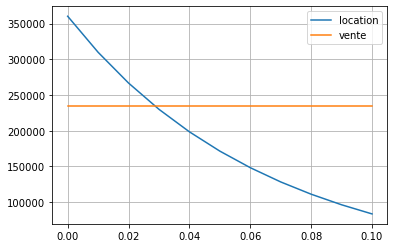

In [10]:
scenario0 = VenteLocation(prix_vente=500e3,
                          taux_croissance=0.02,
                          taux_inflation=0.02,
                          couts_construction=246e3,
                          hypotheque_2021=235e3,
                          terme_hyp=24,
                          taux_hyp=0.018,
                          paiement_hyp=1005,
                          taux_marginal=0.3,
                          taux_marginal_vente=0.4,
                          revenu_location=35000,
                          depenses_operation=22000,
                          amortissement=2500,
                          penalite_hyp=0,
                          frais_vente=5000)


compare(scenario0)

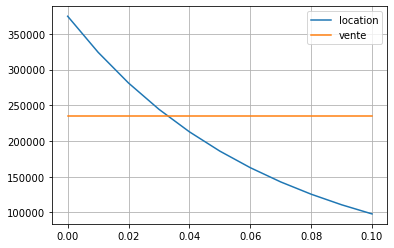

In [13]:
scenario1 = VenteLocation(prix_vente=500e3,
                          taux_croissance=0.02,
                          taux_inflation=0.02,
                          couts_construction=246e3,
                          hypotheque_2021=235e3,
                          terme_hyp=24,
                          taux_hyp=0.018,
                          paiement_hyp=1005,
                          taux_marginal=0.3,
                          taux_marginal_vente=0.4,
                          revenu_location=55000,
                          depenses_operation=22000,
                          amortissement=2500,
                          penalite_hyp=0,
                          frais_vente=5000)


compare(scenario1)

In [ ]:
# old functions

def calc_hyp(self):
"""terme en mois, taux_interet annuel"""
    taux_interet_mensuel = (1 + self.taux_hyp)**(1 / 12) - 1
    self.paiement = calc_paiements(self.hypotheque_2021, self.taux_hyp, self.terme_hyp)
    interet = solde * taux_interet_mensuel
    remboursement = paiement - interet
    return paiement, interet, remboursement

def calc_paiements(self, solde, taux_interet, terme):
    def diff_paiements(paiement, self.solde, taux_interet, terme):
        taux_interet_mensuel = (1 + taux_interet)**(1 / 12) - 1
        valeur_presente_paiements = 0
        for t in range(terme):
            valeur_presente_paiements += paiement / (1 + taux_interet_mensuel)**t
        return solde - valeur_presente_paiements
    calc_paiements = partial(diff_paiements, solde=solde, taux_interet=taux_interet,
                             terme=terme)
return np.round(optimize.bisect(calc_paiements, 0, 100000), 3)
